# DLDC Project Dataviewer
## Load the Data

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

unit = ['unit_number','time']
settings = ['operational_setting 1','operational_setting 2','operational_setting 3']
sensors = [f"sensor_{i}" for i in range(1, 22)]

columns = unit+settings+sensors
pwd = './data/'

# Load data for FD001
train_FD001 = pd.read_csv(pwd+'train_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD001 = pd.read_csv(pwd+'test_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD001 = pd.read_csv(pwd+'RUL_FD001.txt', header=None)


# Load data for FD002
train_FD002 = pd.read_csv(pwd+'train_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD002 = pd.read_csv(pwd+'test_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD002 = pd.read_csv(pwd+'RUL_FD002.txt', header=None)

# Load data for FD003
train_FD003 = pd.read_csv(pwd+'train_FD003.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD003 = pd.read_csv(pwd+'test_FD003.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD003 = pd.read_csv(pwd+'RUL_FD003.txt', header=None)

# Load data for FD004
train_FD004 = pd.read_csv(pwd+'train_FD004.txt', delimiter=' ', header=None, index_col=False, names=columns)
test_FD004 = pd.read_csv(pwd+'test_FD004.txt', delimiter=' ', header=None, index_col=False, names=columns)
RUL_FD004 = pd.read_csv(pwd+'RUL_FD004.txt', header=None)

# Add unit names to RUL
for RUL in [RUL_FD001, RUL_FD002, RUL_FD003, RUL_FD004]:
    RUL.insert(0, '-', [unit_name for unit_name in range(1,RUL.shape[0]+1)], True)
    RUL.columns = [unit[0],'RUL']

C:\Users\kleme\AppData\Local\Temp\ipykernel_19888\2662633332.py:16: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_FD001 = pd.read_csv(pwd+'train_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_19888\2662633332.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_FD001 = pd.read_csv(pwd+'test_FD001.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_19888\2662633332.py:22: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_FD002 = pd.read_csv(pwd+'train_FD002.txt', delimiter=' ', header=None, index_col=False, names=columns)
C:\Users\kleme\AppData\Local\Temp\ipykernel_19888\2662633332.py:23: ParserWarning: Length of hea

## Visualize Correlation between Measurements

In [42]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by=unit[0]) 
    max_time_cycles = train_grouped_by_unit['time'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on=unit[0],right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

train_FD001 = add_RUL_column(train_FD001)

train_FD001

unit_number  time  operational_setting 1  operational_setting 2   
0                1     1                -0.0007                -0.0004  \
1                1     2                 0.0019                -0.0003   
2                1     3                -0.0043                 0.0003   
3                1     4                 0.0007                 0.0000   
4                1     5                -0.0019                -0.0002   
...            ...   ...                    ...                    ...   
20626          100   196                -0.0004                -0.0003   
20627          100   197                -0.0016                -0.0005   
20628          100   198                 0.0004                 0.0000   
20629          100   199                -0.0011                 0.0003   
20630          100   200                -0.0032                -0.0005   

       operational_setting 3  sensor_1  sensor_2  sensor_3  sensor_4   
0                      100.0    518.67    641.82   1589.70   1400.60  \
1                      100.0    518.67    642.15   1591.82   1403.14   
2                      100.0    518.67    642.35   1587.99   1404.20   
3                      100.0    518.67    642.35   1582.79   1401.87   
4                      100.0    518.67    642.37   1582.85   1406.22   
...                      ...       ...       ...       ...       ...   
20626                  100.0    518.67    643.49   1597.98   1428.63   
20627                  100.0    518.67    643.54   1604.50   1433.58   
20628                  100.0    518.67    643.42   1602.46   1428.18   
20629                  100.0    518.67    643.23   1605.26   1426.53   
20630                  100.0    518.67    643.85   1600.38   1432.14   

       sensor_5  ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17   
0         14.62  ...    2388.02    8138.62     8.4195       0.03        392  \
1         14.62  ...    2388.07    8131.49     8.4318       0.03        392   
2         14.62  ...    2388.03    8133.23     8.4178       0.03        390   
3         14.62  ...    2388.08    8133.83     8.3682       0.03        392   
4         14.62  ...    2388.04    8133.80     8.4294       0.03        393   
...         ...  ...        ...        ...        ...        ...        ...   
20626     14.62  ...    2388.26    8137.60     8.4956       0.03        397   
20627     14.62  ...    2388.22    8136.50     8.5139       0.03        395   
20628     14.62  ...    2388.24    8141.05     8.5646       0.03        398   
20629     14.62  ...    2388.23    8139.29     8.5389       0.03        395   
20630     14.62  ...    2388.26    8137.33     8.5036       0.03        396   

       sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0           2388      100.0      39.06    23.4190  191  
1           2388      100.0      39.00    23.4236  190  
2           2388      100.0      38.95    23.3442  189  
3           2388      100.0      38.88    23.3739  188  
4           2388      100.0      38.90    23.4044  187  
...          ...        ...        ...        ...  ...  
20626       2388      100.0      38.49    22.9735    4  
20627       2388      100.0      38.30    23.1594    3  
20628       2388      100.0      38.44    22.9333    2  
20629       2388      100.0      38.29    23.0640    1  
20630       2388      100.0      38.37    23.0522    0  

[20631 rows x 27 columns]

<AxesSubplot: >

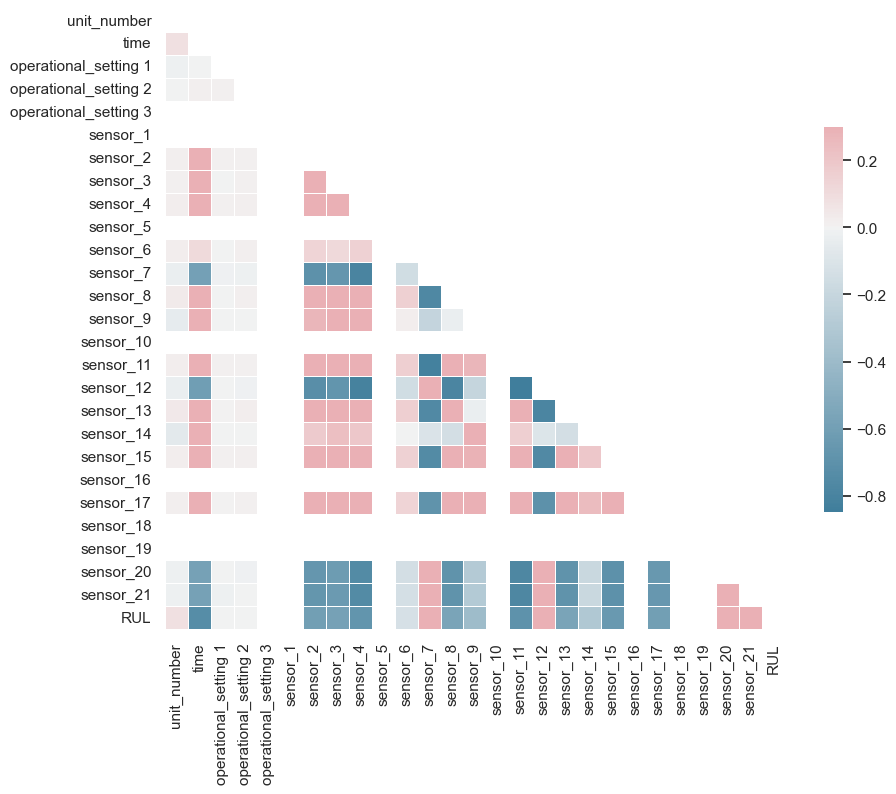

In [43]:
# Compute the correlation matrix
corr = train_FD001.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
# Correlation of Measurements to RUL
corr.tail(1).transpose()

RUL
unit_number            0.078753
time                  -0.736241
operational_setting 1 -0.003198
operational_setting 2 -0.001948
operational_setting 3       NaN
sensor_1                    NaN
sensor_2              -0.606484
sensor_3              -0.584520
sensor_4              -0.678948
sensor_5                    NaN
sensor_6              -0.128348
sensor_7               0.657223
sensor_8              -0.563968
sensor_9              -0.390102
sensor_10                   NaN
sensor_11             -0.696228
sensor_12              0.671983
sensor_13             -0.562569
sensor_14             -0.306769
sensor_15             -0.642667
sensor_16                   NaN
sensor_17             -0.606154
sensor_18                   NaN
sensor_19                   NaN
sensor_20              0.629428
sensor_21              0.635662
RUL                    1.000000

## Drop Labels that have no correlation to RUL

- Drop Sensors that have no corr with RUL at all (NaN)
- Drop Sensors with low correlation (<0.5)
- IDEA: Bin sensors which bifurcate? (https://developers.google.com/machine-learning/data-prep/transform/normalization)

In [87]:
corr = train_FD001.corr()

for sensor in settings:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    if corr.tail(1)[sensor].isna().any():
        corr = corr.drop(columns=sensor)

for sensor in sensors:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    if corr.tail(1)[sensor].isna().any():
        corr = corr.drop(columns=sensor)

low_correlation = ['sensor_6']
bifurcate = ['sensor_9', 'sensor_14']

for sensor in low_correlation+bifurcate:
    # corr.tail(1)[sensor]
    # print(sensor+f": {corr.tail(1)[sensor].isna().all()}")
    corr = corr.drop(columns=sensor)

features = corr.columns
corr.tail(1).transpose()

RUL
unit_number            0.078753
time                  -0.736241
operational_setting 1 -0.003198
operational_setting 2 -0.001948
sensor_2              -0.606484
sensor_3              -0.584520
sensor_4              -0.678948
sensor_7               0.657223
sensor_8              -0.563968
sensor_11             -0.696228
sensor_12              0.671983
sensor_13             -0.562569
sensor_15             -0.642667
sensor_17             -0.606154
sensor_20              0.629428
sensor_21              0.635662
RUL                    1.000000

In [82]:
sensor_dictionary = {'sensor_1': '(Fan inlet temperature) ($^◦$R)',
 'sensor_2': '(LPC outlet temperature) ($^◦$R)',
 'sensor_3': '(HPC outlet temperature) ($^◦$R)',
 'sensor_4': '(LPT outlet temperature) ($^◦$R)',
 'sensor_5': '(Fan inlet Pressure) (psia)',
 'sensor_6': '(bypass-duct pressure) (psia)',
 'sensor_7': '(HPC outlet pressure) (psia)',
 'sensor_8': '(Physical fan speed) (rpm)',
 'sensor_9': '(Physical core speed) (rpm)',
 'sensor_10': '(Engine pressure ratio(P50/P2)',
 'sensor_11': '(HPC outlet Static pressure) (psia)',
 'sensor_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sensor_13': '(Corrected fan speed) (rpm)',
 'sensor_14': '(Corrected core speed) (rpm)',
 'sensor_15': '(Bypass Ratio) ',
 'sensor_16': '(Burner fuel-air ratio)',
 'sensor_17': '(Bleed Enthalpy)',
 'sensor_18': '(Required fan speed)',
 'sensor_19': '(Required fan conversion speed)',
 'sensor_20': '(High-pressure turbines Cool air flow)',
 'sensor_21': '(Low-pressure turbines Cool air flow)'}

def plot_signal(df, sensor_dictionary, signal):
    plt.figure(figsize=(13,5))
    for i in df[unit[0]].unique():
        if True or (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', (signal), data=df[df[unit[0]]==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    try:
        plt.ylabel(signal+': '+sensor_dictionary[signal])
    except:
        plt.ylabel(signal)
    plt.xlabel('Remaining Useful Life')
    plt.show()

operational_setting 1


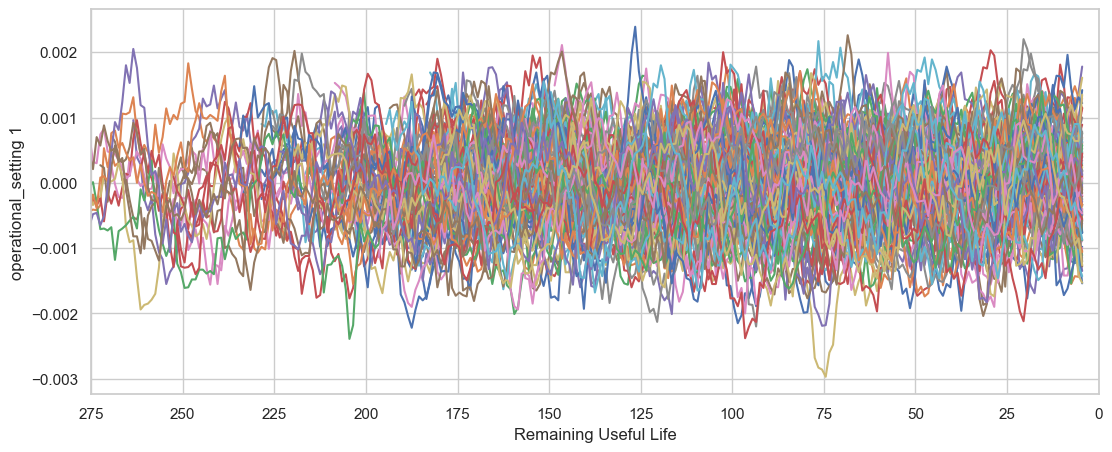

operational_setting 2


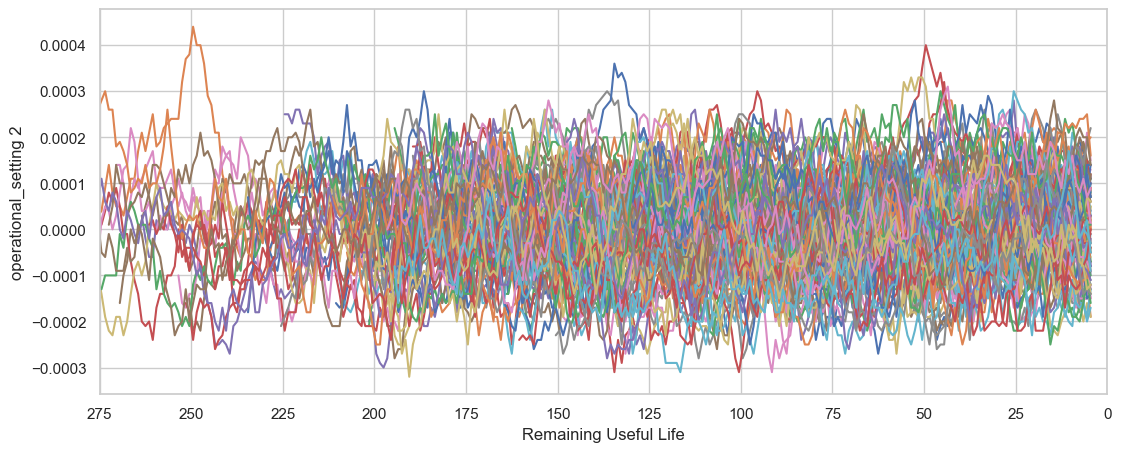

sensor_2


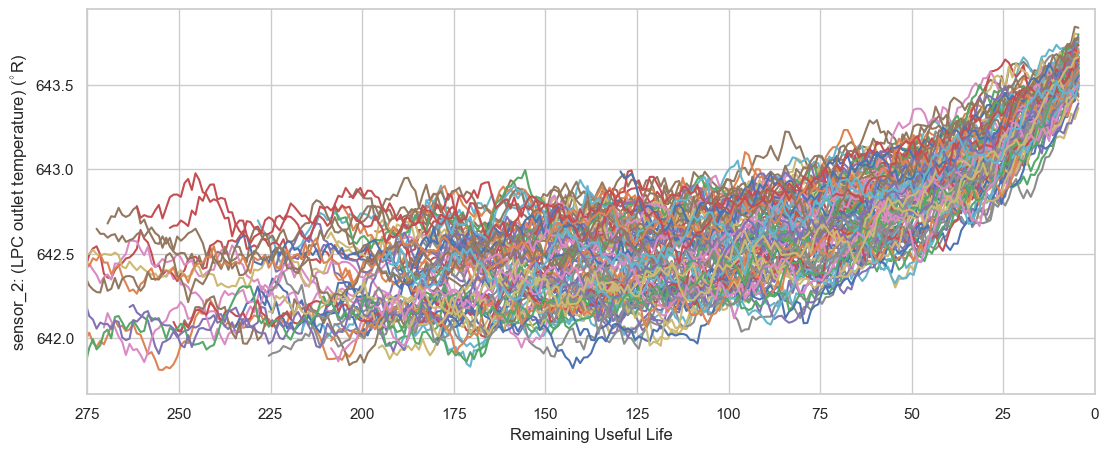

sensor_3


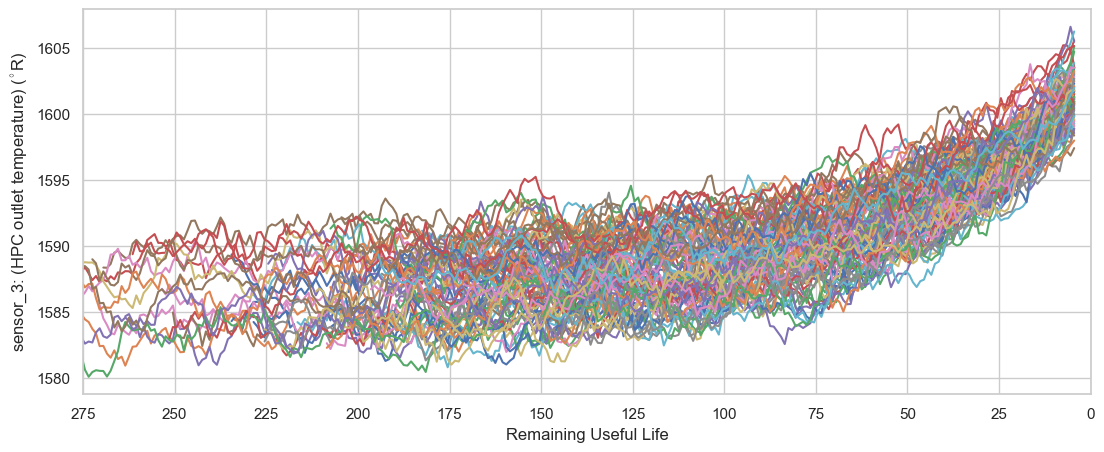

sensor_4


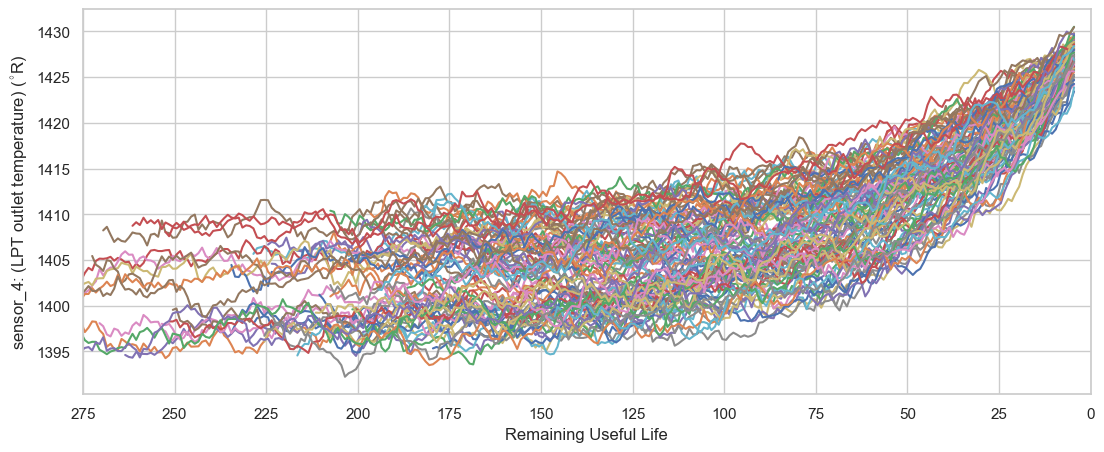

sensor_7


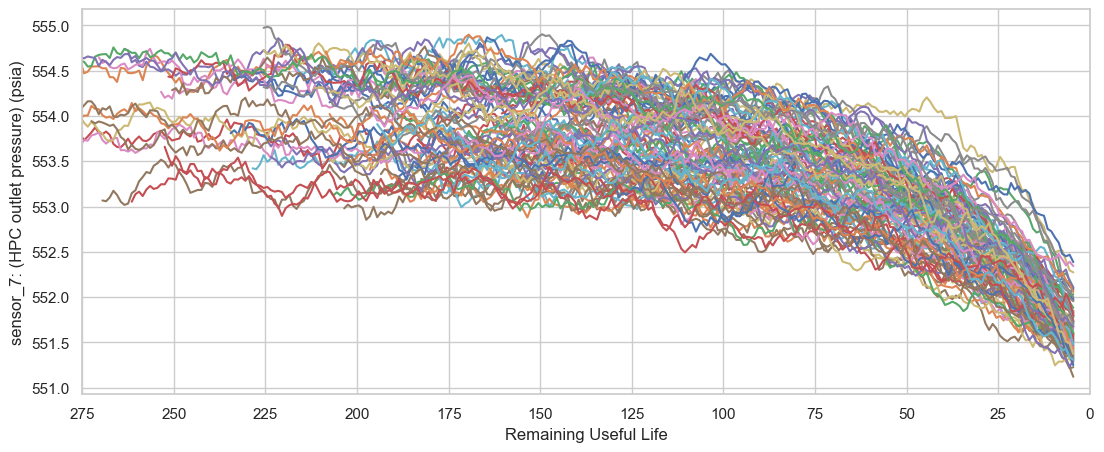

sensor_8


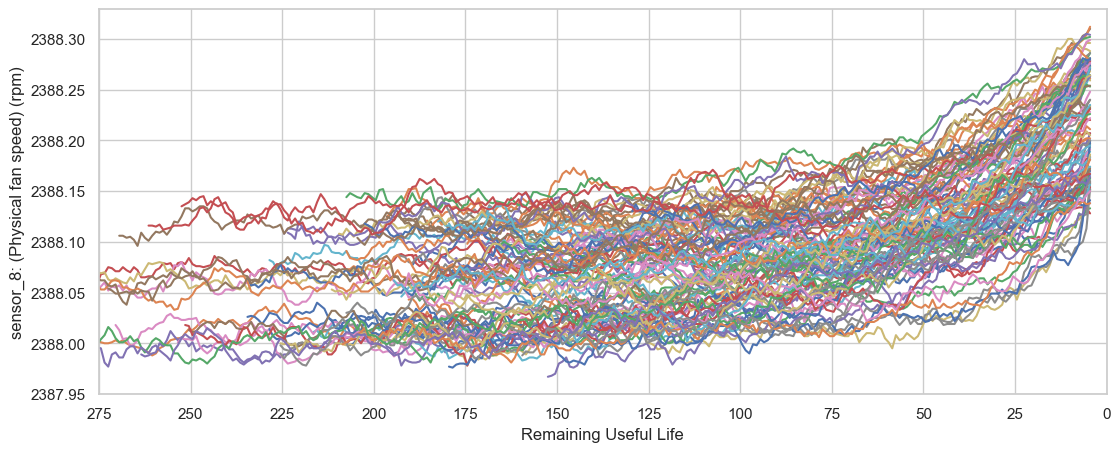

sensor_11


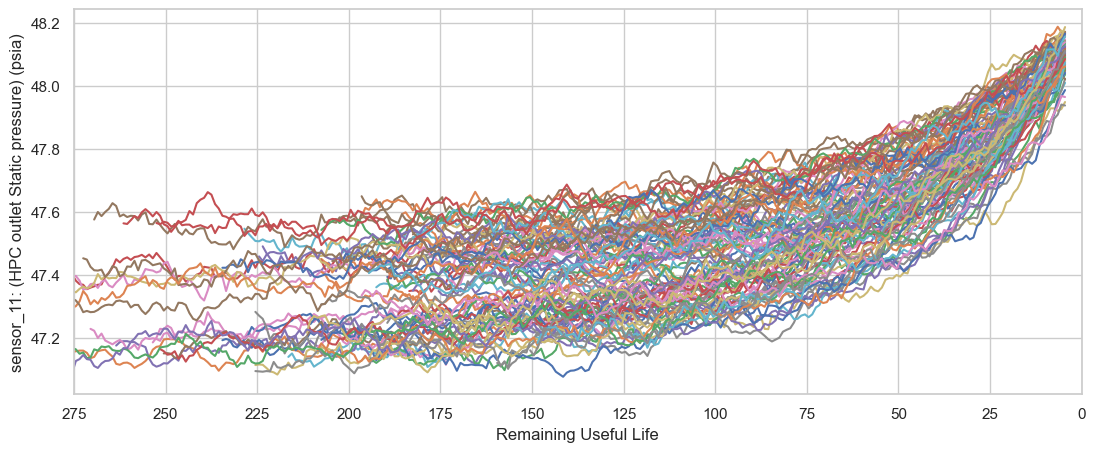

sensor_12


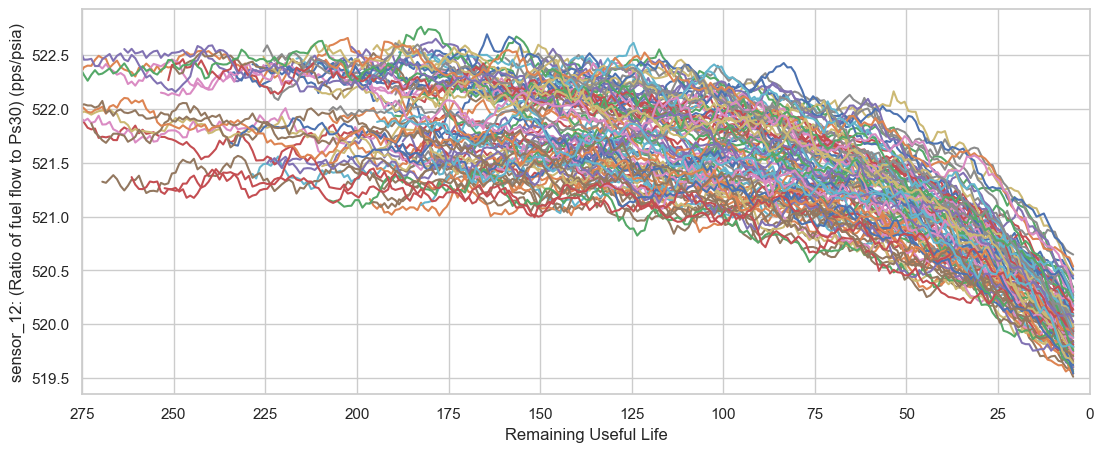

sensor_13


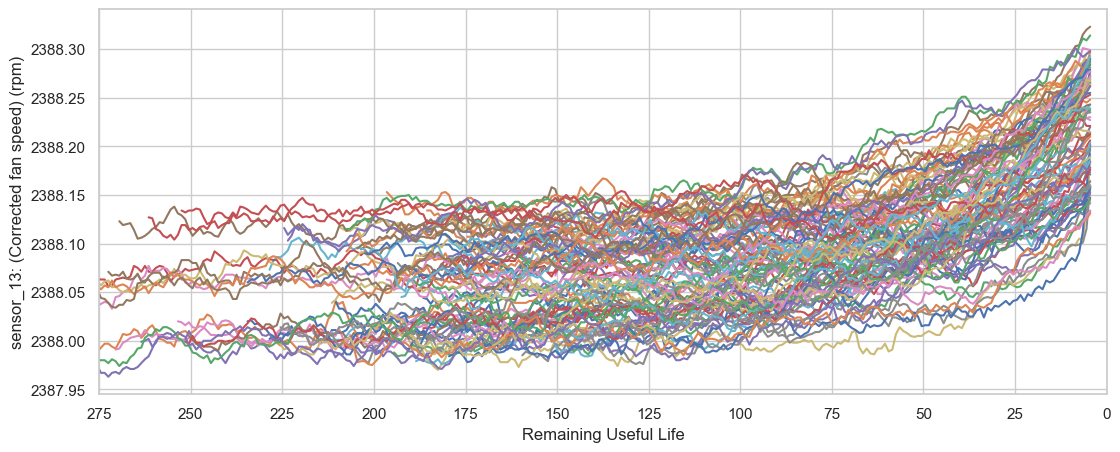

sensor_15


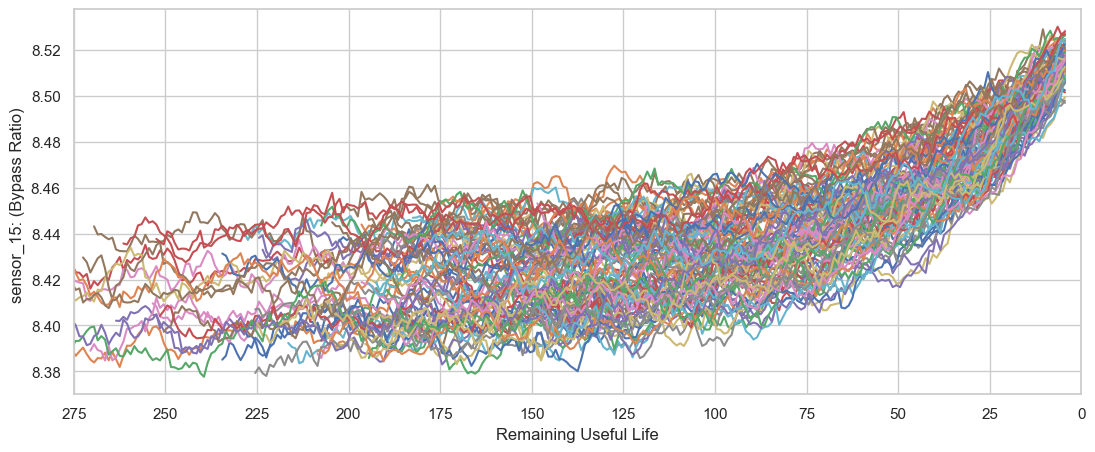

sensor_17


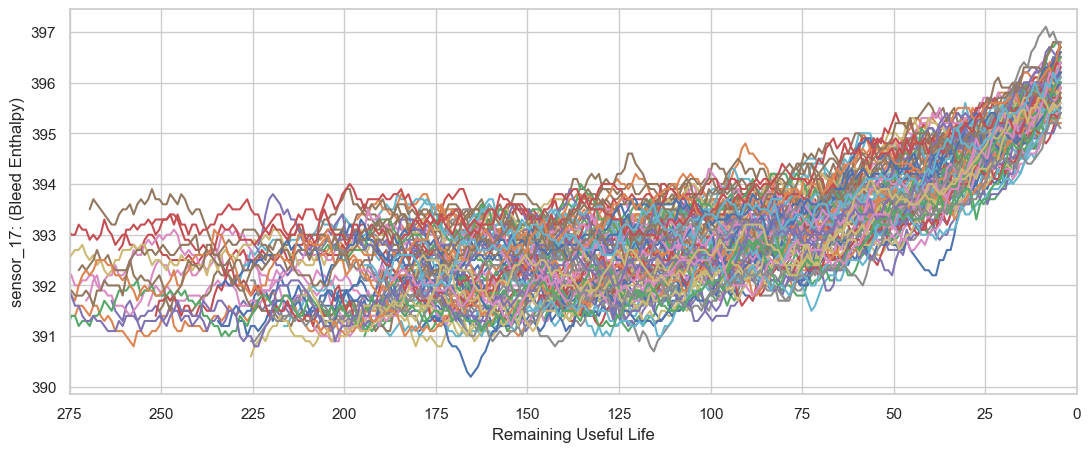

sensor_20


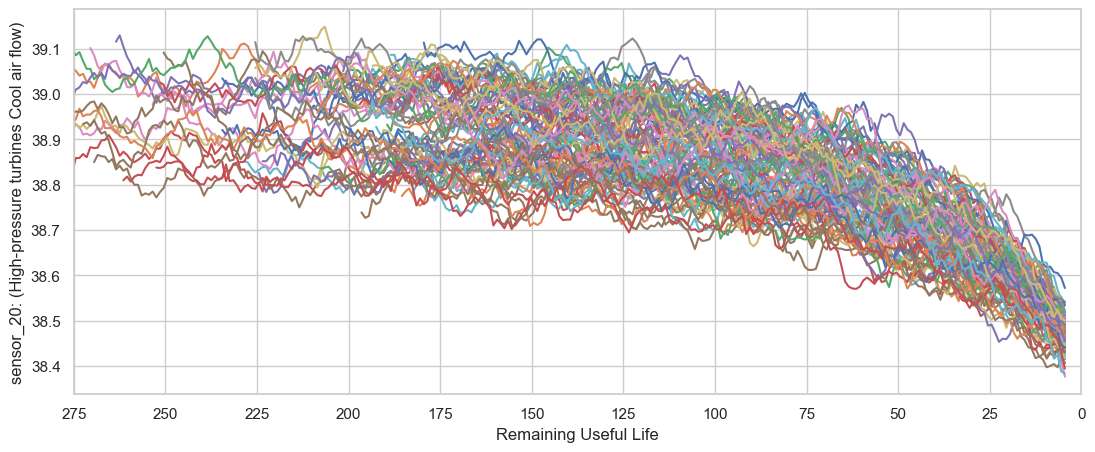

sensor_21


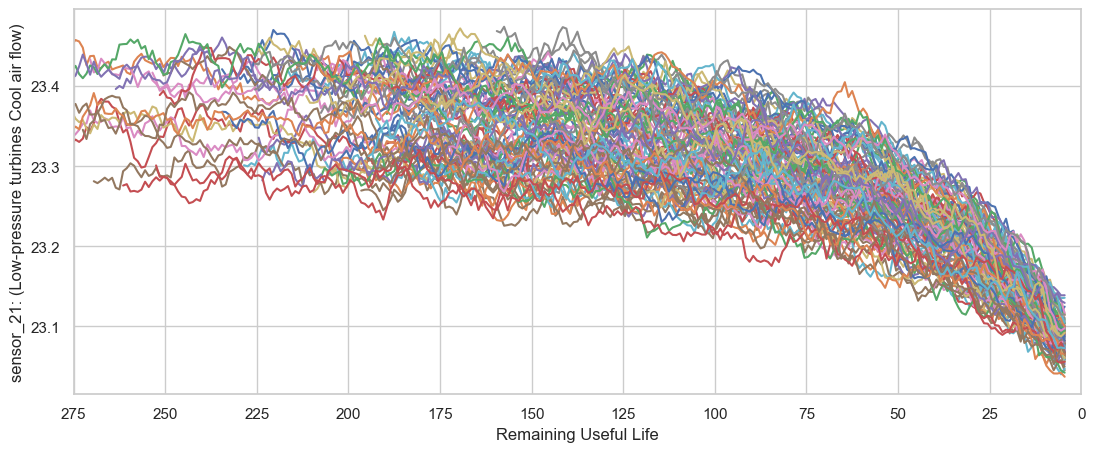

In [88]:
for sensor in features[2:-1]:
    try:
        print(sensor)
        plot_signal(train_FD001, sensor_dictionary,sensor)
    except:
        pass

In [48]:
def plot_histogram(df, sensor_dictionary, signal):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    sns.histplot(x=df['RUL'], y=df[signal],
                    linewidth=0,
                    ax=ax)
    try:
        plt.ylabel(signal+': '+sensor_dictionary[signal])
    except:
        plt.ylabel(signal)
    plt.xlabel('Remaining Useful Life')
    ax.invert_xaxis()

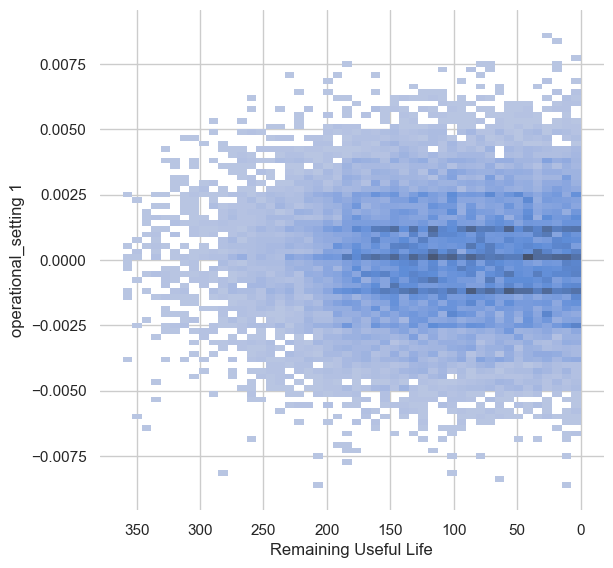

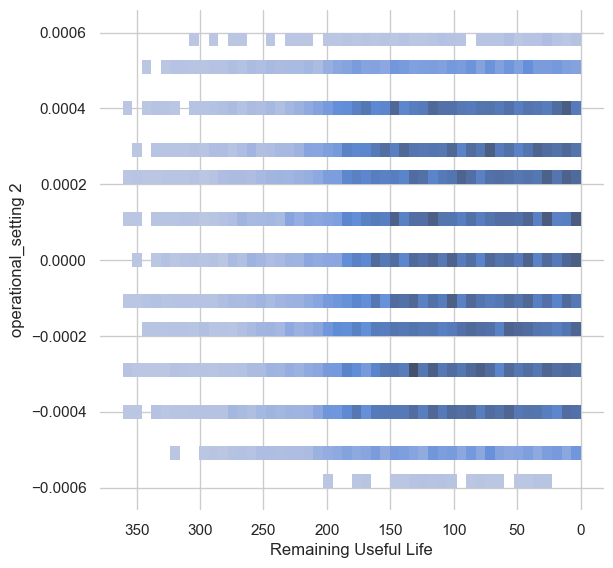

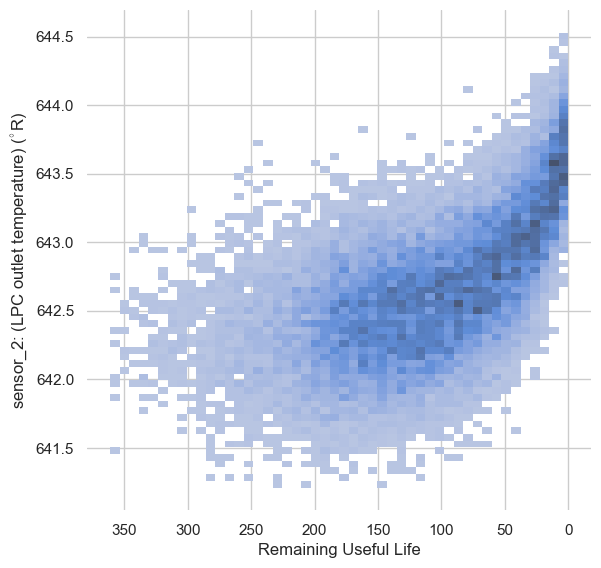

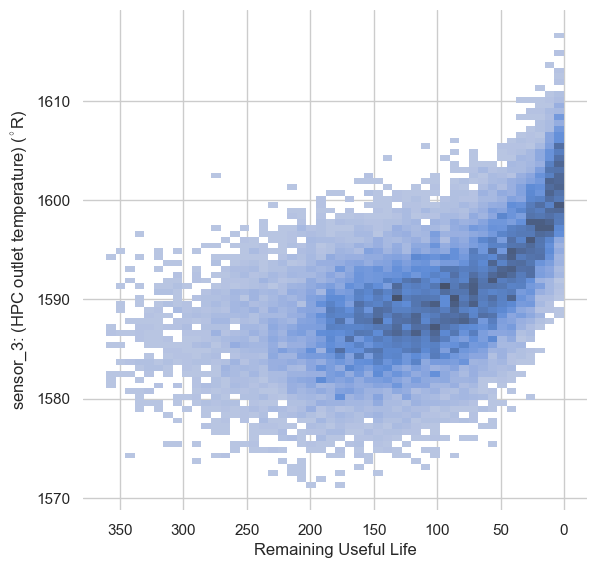

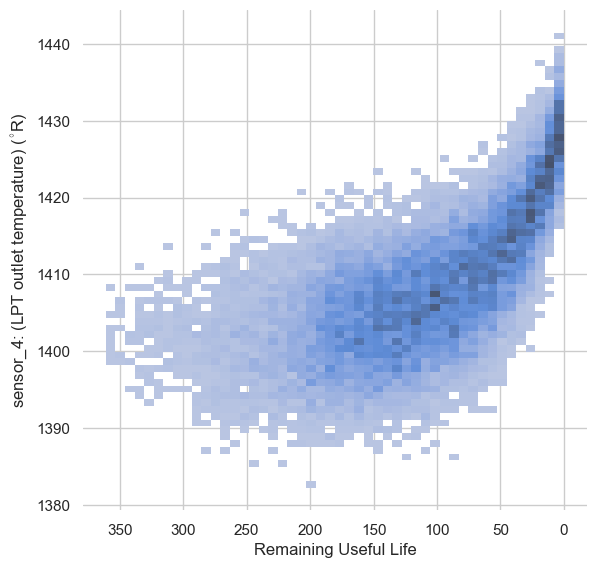

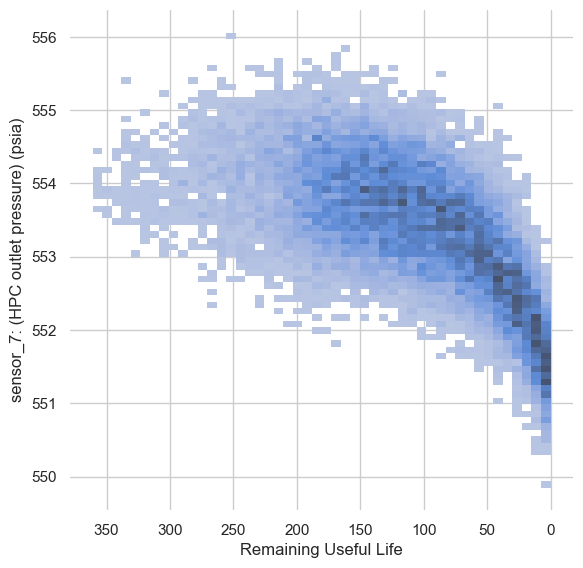

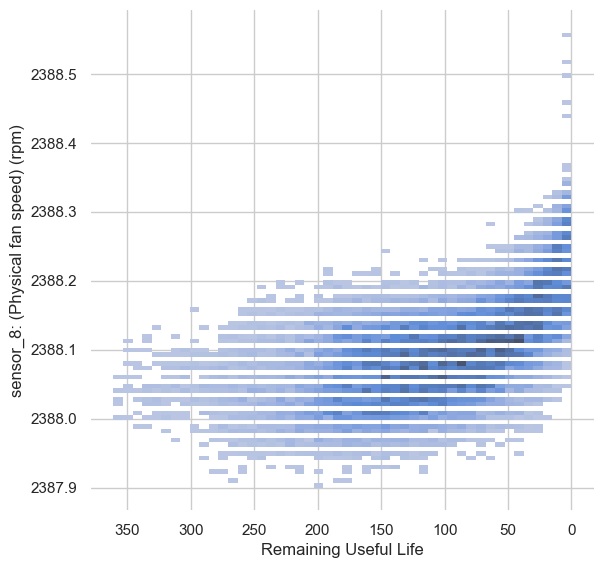

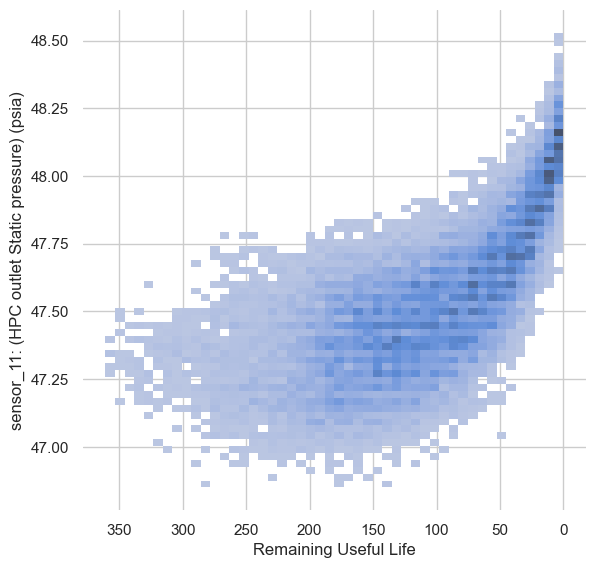

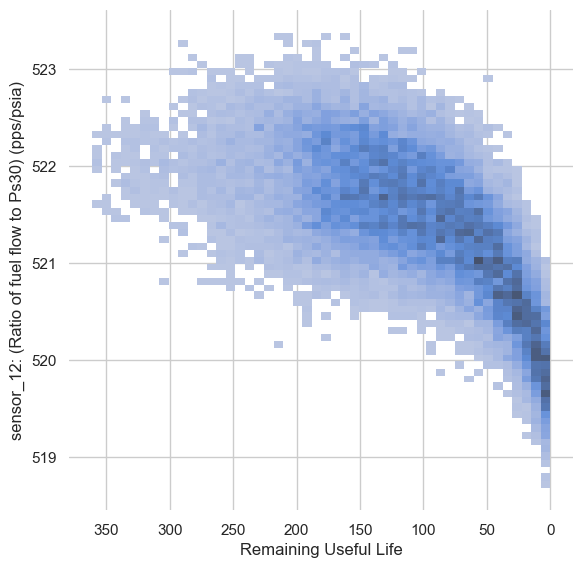

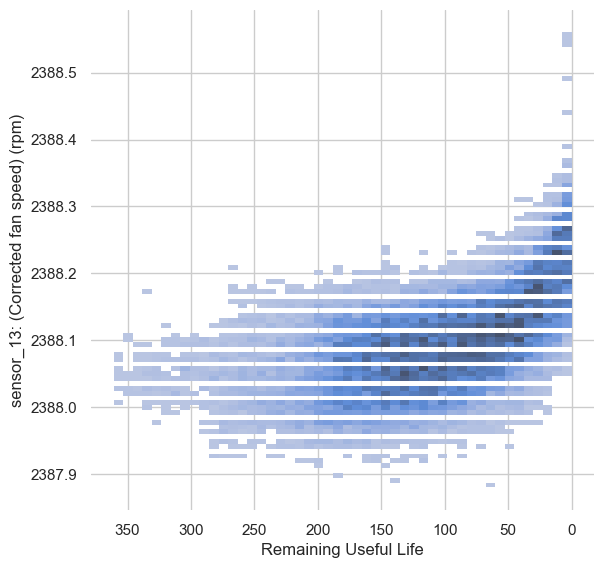

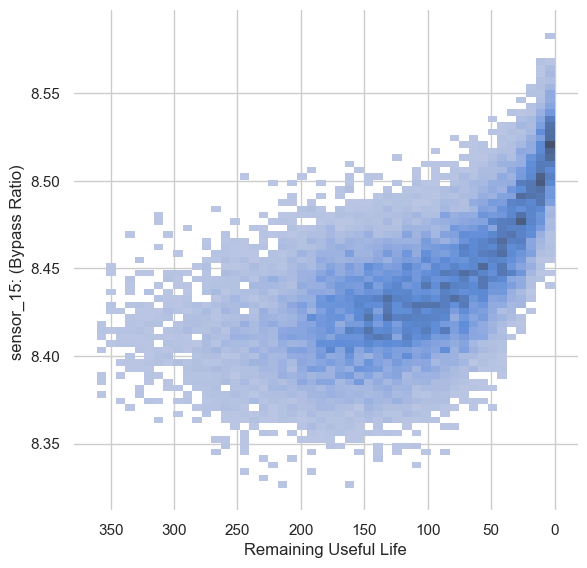

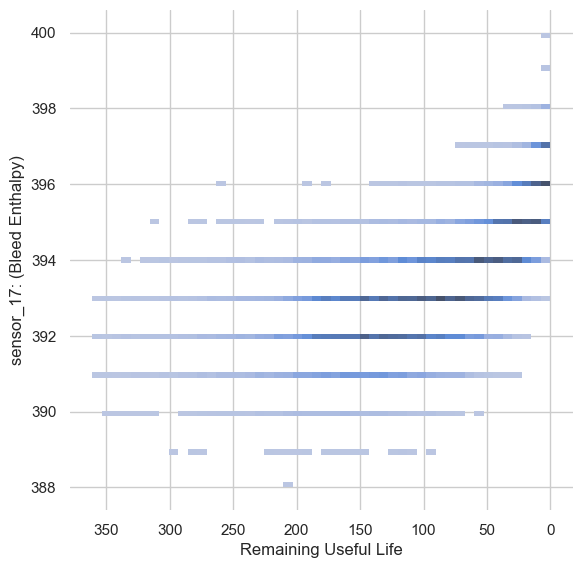

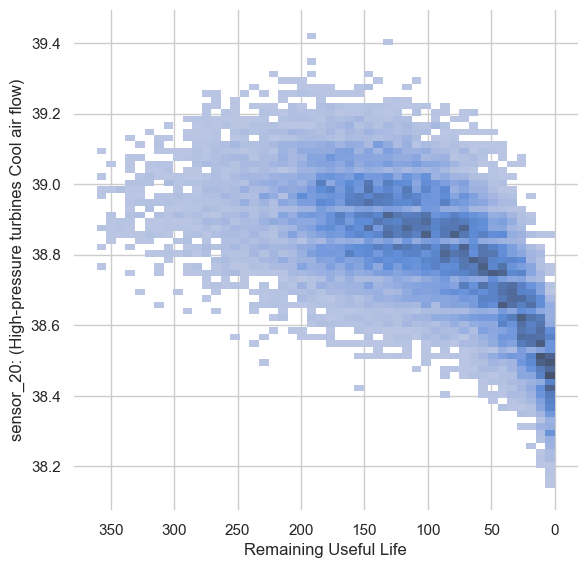

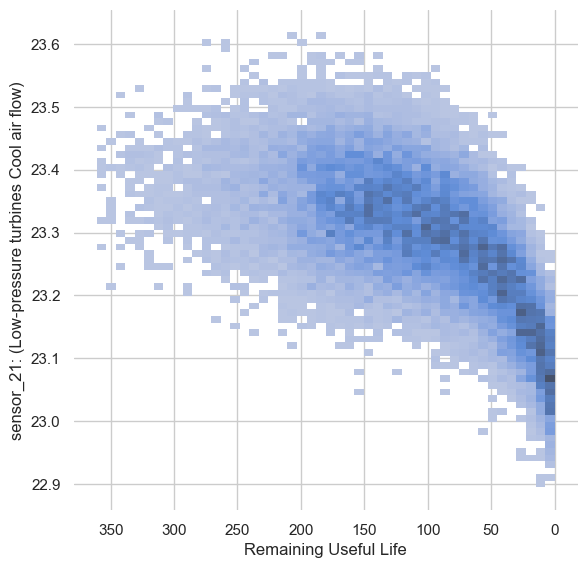

In [89]:
for sensor in features[2:-1]:
    try:
        plot_histogram(train_FD001, sensor_dictionary,sensor)
    except:
        pass

# Normalize the Data

https://developers.google.com/machine-learning/data-prep/transform/normalization

In [90]:
train_FD001_normalized = pd.DataFrame()

for sensor in features[:2]:
    train_FD001_normalized[sensor] = train_FD001[sensor]

train_FD001_normalized['RUL'] = train_FD001['RUL']

for sensor in features[2:-1]:
    train_FD001_normalized[sensor] = train_FD001[sensor] # np.log(train_FD001[sensor])

for sensor in features[2:-1]:
    train_FD001_normalized[sensor] = (train_FD001_normalized[sensor] - train_FD001_normalized[sensor].mean()) / train_FD001_normalized[sensor].std()

train_FD001_normalized

unit_number  time  RUL  operational_setting 1  operational_setting 2   
0                1     1  191              -0.315972              -1.372920  \
1                1     2  190               0.872701              -1.031695   
2                1     3  189              -1.961827               1.015652   
3                1     4  188               0.324083              -0.008022   
4                1     5  187              -0.864590              -0.690471   
...            ...   ...  ...                    ...                    ...   
20626          100   196    4              -0.178817              -1.031695   
20627          100   197    3              -0.727436              -1.714145   
20628          100   198    2               0.186928              -0.008022   
20629          100   199    1              -0.498845               1.015652   
20630          100   200    0              -1.458927              -1.714145   

       sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  sensor_11  sensor_12   
0     -1.721684 -0.134252 -0.925914  1.121113 -0.516326  -0.266460   0.334254  \
1     -1.061754  0.211523 -0.643710  0.431920 -0.798074  -0.191578   1.174871   
2     -0.661797 -0.413156 -0.525940  1.008131 -0.234578  -1.015279   1.364688   
3     -0.661797 -1.261284 -0.784812  1.222798  0.188044  -1.539452   1.961255   
4     -0.621801 -1.251498 -0.301511  0.714376 -0.516326  -0.977838   1.052846   
...         ...       ...       ...       ...       ...        ...        ...   
20626  1.617961  1.216229  2.188322 -2.189276  1.315035   1.979996  -2.607906   
20627  1.717950  2.279651  2.738285 -2.833277  1.878530   1.867673  -2.350298   
20628  1.477975  1.946924  2.138325 -2.742891  2.019404   2.054877  -1.902872   
20629  1.098016  2.403608  1.955004 -3.036645  2.160278   3.178105  -2.363856   
20630  2.337884  1.607673  2.578295 -2.912364  2.301152   2.466728  -2.865515   

       sensor_13  sensor_15  sensor_17  sensor_20  sensor_21  
0      -1.058865  -0.603801  -0.781691   1.348460   1.194398  
1      -0.363637  -0.275845  -0.781691   1.016503   1.236892  
2      -0.919819  -0.649128  -2.073044   0.739873   0.503411  
3      -0.224592  -1.971617  -0.781691   0.352590   0.777773  
4      -0.780774  -0.339837  -0.136014   0.463242   1.059526  
...          ...        ...        ...        ...        ...  
20626   2.278227   1.425260   2.446692  -1.805129  -2.921042  
20627   1.722045   1.913194   1.155339  -2.856326  -1.203735  
20628   2.000136   3.265013   3.092369  -2.081760  -3.292402  
20629   1.861090   2.579771   1.155339  -2.911652  -2.085021  
20630   2.278227   1.638564   1.801015  -2.469043  -2.194027  

[20631 rows x 17 columns]

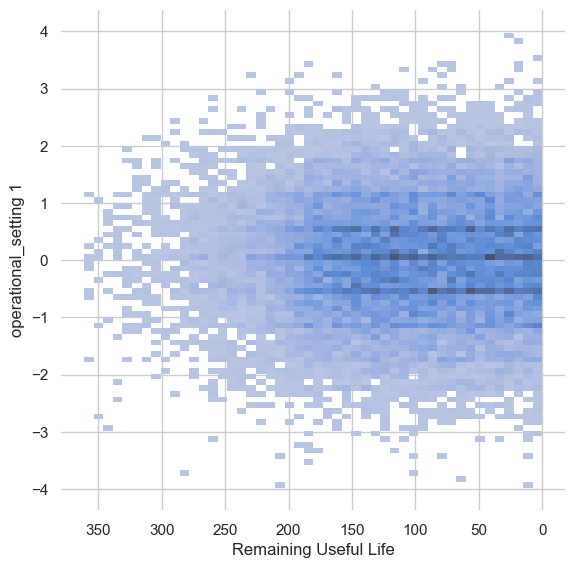

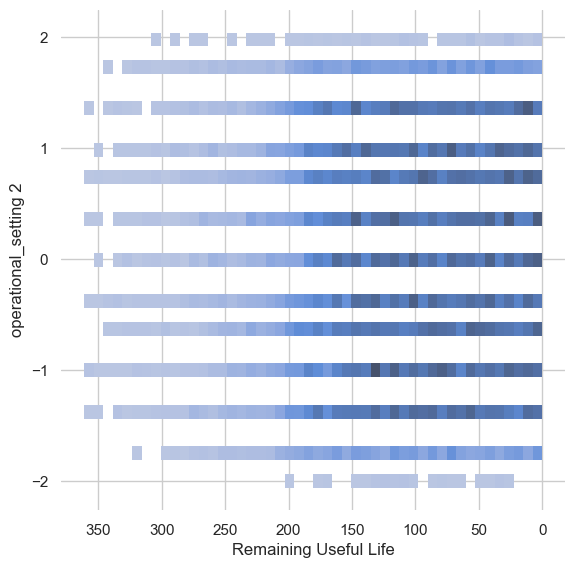

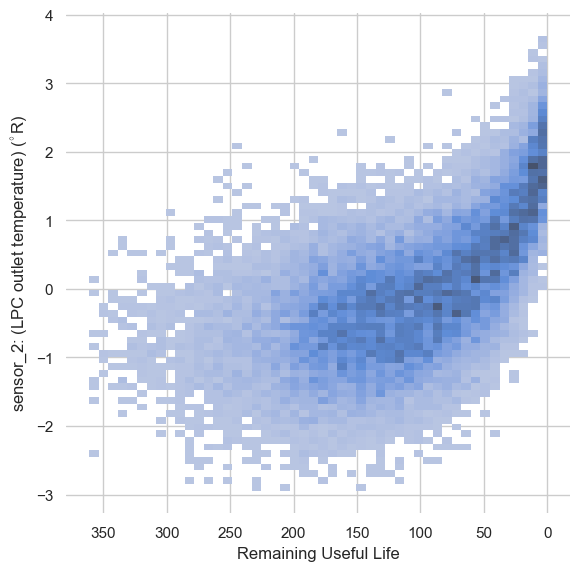

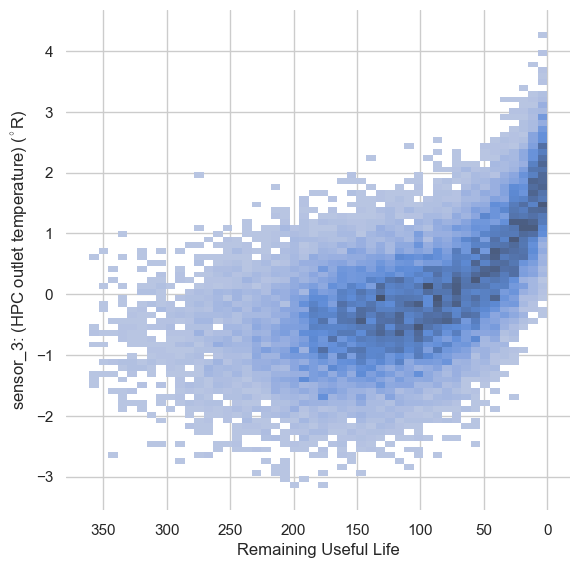

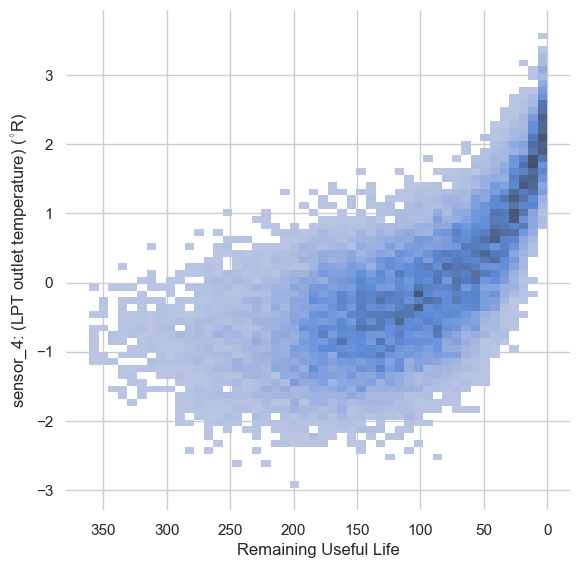

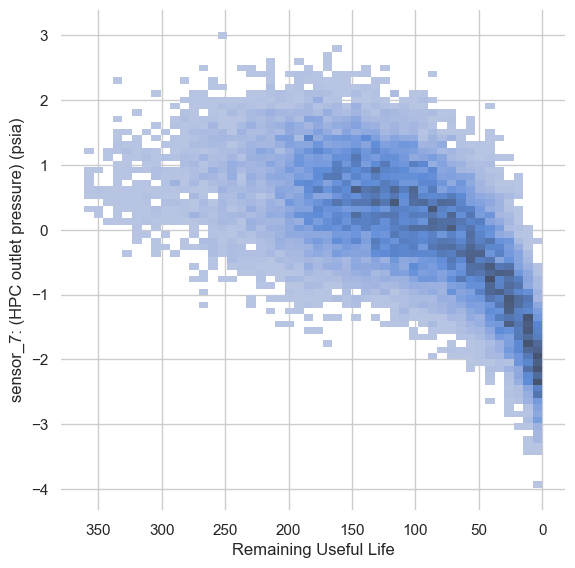

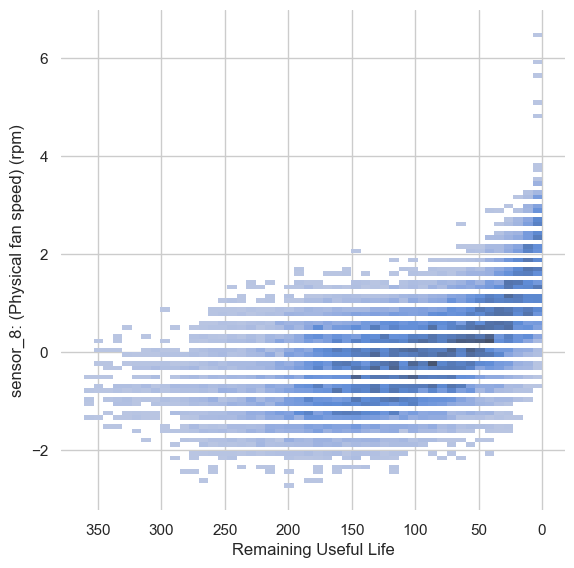

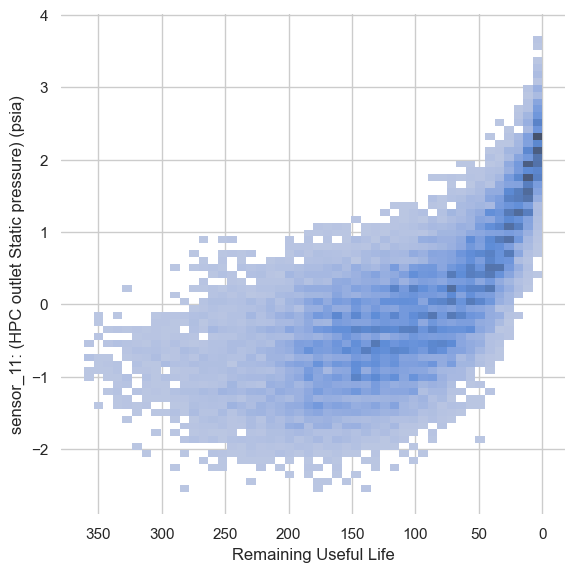

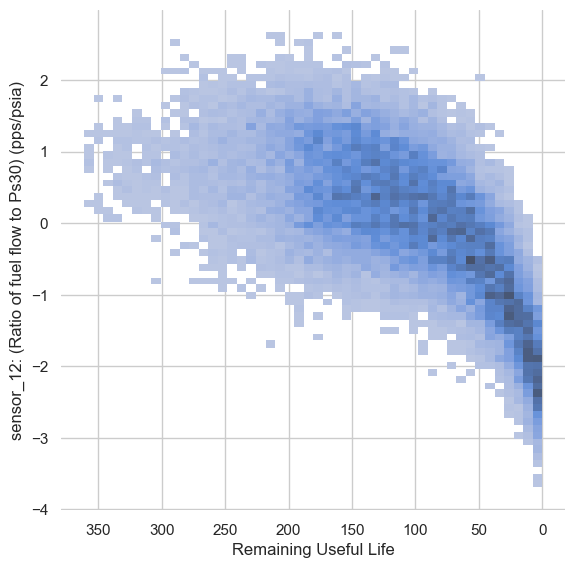

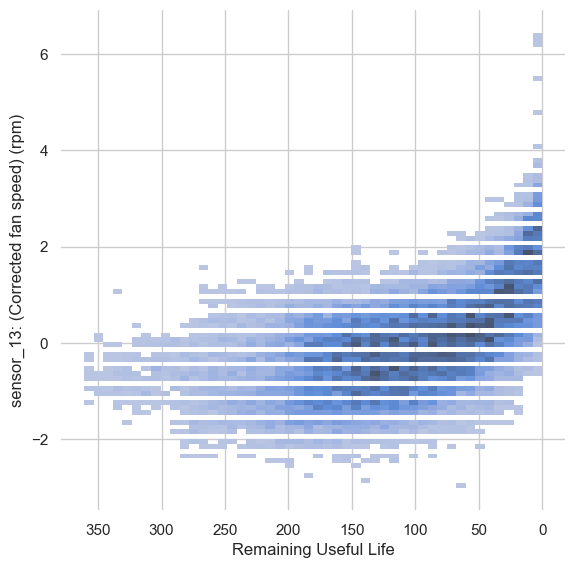

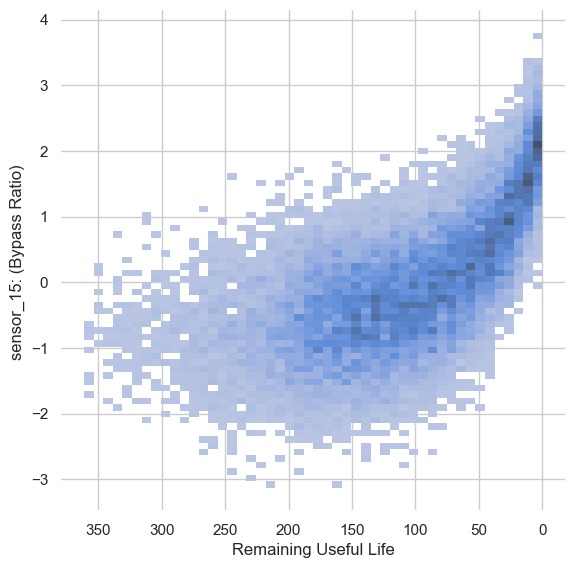

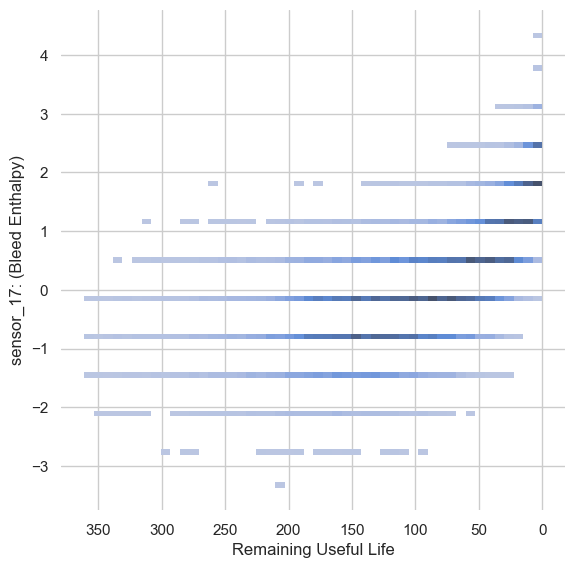

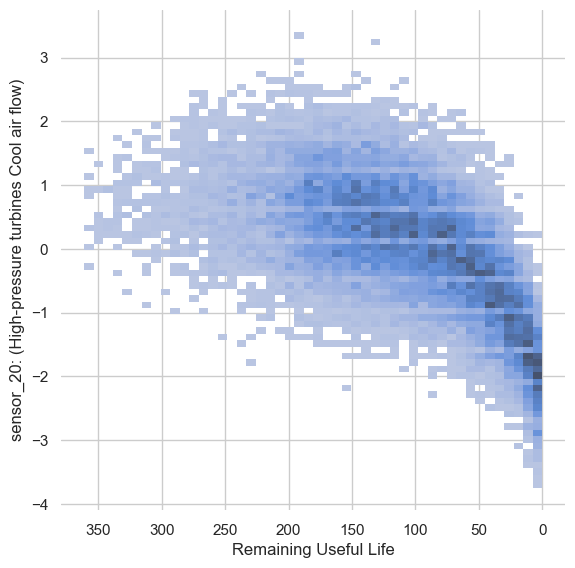

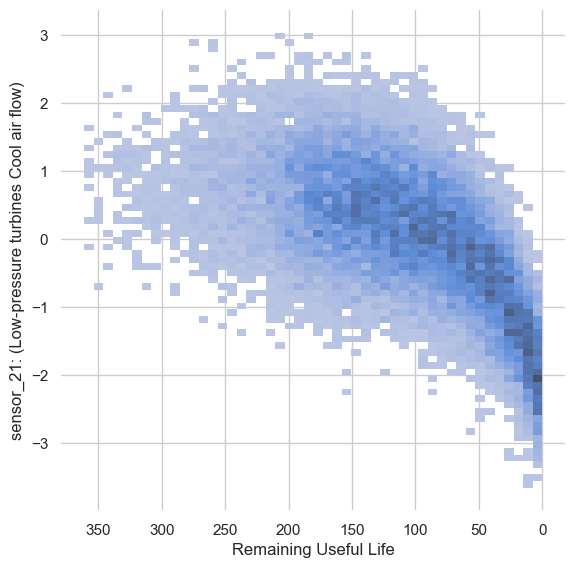

In [91]:
for sensor in features[2:-1]:
    try:
        plot_histogram(train_FD001_normalized, sensor_dictionary,sensor)
    except:
        pass